# Homework #3
## Introduction to deep learning 


This colaboratory contains Homework #3 which is due **October 16 midnight (23:59 EET time)**. To complete the homework, extract **(File -> Download .ipynb)** and submit to the course webpage.

**NB! Links to your colaboratory will not be accepted as a solution!**
## Submission's rules:

1.   Please, submit only .ipynb that you extract from the Colaboratory.
2. Run your homework exercises before submitting (output should be present, preferably restart the kernel and press run all the cells).
3. Do not change the description of tasks in red (even if there is a typo|mistake|etc).
4. Please, make sure to avoid unnecessary long printouts.
5. Each task should be solved right under the question of the task and not elsewhere.
6. Solutions to both regular and bonus exercises should be submitted in one IPYNB file.

Please, steer clear of copying someone else's work. If you discuss assignments with anyone in the course, please, mention their names here:
1. Karl-Johan Pilve


##List of Homework's exercises:

1.   [Ex1](#scrollTo=4YtaQwccjrAL) - 6 points
2.   [Ex2](#scrollTo=tOfgGIUtIizt) - 2 points
3.   [Ex3](#scrollTo=rt6Fuo28nQkd) - 2 points
4.   [Bonus 1](#scrollTo=wT-4aQqUtDU7) - 2 points
5.   [Bonus 2](#scrollTo=lEW4oyQhnRQA) - 2 points


In [4]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

Here we will define few functions that will help us visualise classifiers that we are going to build in this class. Don't worry if you don't understand this code completely.

In [5]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# for very shallow models
def plot_classifier(X, y, W, b):
  st = 0.02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, st),
                       np.arange(y_min, y_max, st))
  Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
  Z = np.argmax(Z, axis=1)
  Z = Z.reshape(xx.shape)
  fig = plt.figure()
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=120, edgecolors = 'white', cmap=plt.cm.Spectral)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

# for two-layer network 
def plot_neural_network(X, y, W,b ,W2, b2):
  st = 0.02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, st),
                       np.arange(y_min, y_max, st))
  Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
  Z = np.argmax(Z, axis=1)
  Z = Z.reshape(xx.shape)
  fig = plt.figure()
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=120, edgecolors = 'white', cmap=plt.cm.Spectral)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
N = 100 # number of points per class
D = 2 # number of features (dimensions)
K = 2 # number of classes (purple and red circles)
X = np.zeros((N*K,D)) # data matrix (each row = single example)
num_examples = X.shape[0]
y = np.zeros((N*K, 1), dtype='int') # class labels

In [7]:
# Creating spiral data points
np.random.seed(1111)

for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix, 0] = j

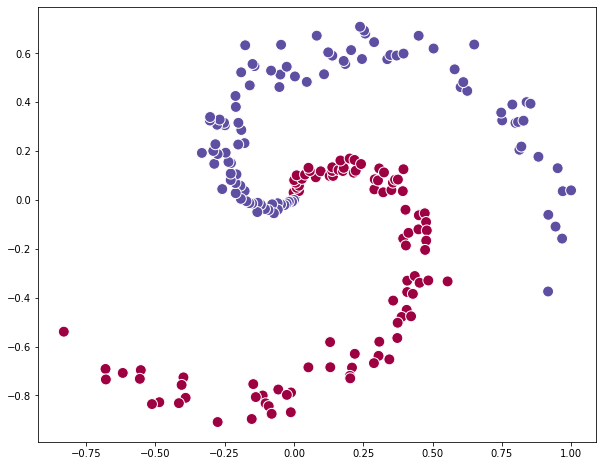

In [8]:
# this is matplotlib...
plt.scatter(X[:, 0], X[:, 1], c=y, s=120, edgecolors = 'white', cmap=plt.cm.Spectral)
plt.show()

For our implementation we would need to transform the vector of correct labels `y` into one hot encoded matrix, let's call it `truth`. Сreating `truth` as one-hot encoded labels (`y`)

In [9]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
truth = enc.fit_transform(y).toarray()

# first column is for red
# second is for purple class

## Homework exercise 1 (6 points): three-layer network
<font color='red'> Obviously, ~91% is not good enough for us, add one more layer to the network that we have defined before, by filling in the gaps.</font>

<font color='red'> **(Homework exercise 1- a)** Initialise weights and compute the forward path with 2 hidden layers (each with `h` neurons and followed by the ReLu) and one output layer **(1 point)**. </font>

In [10]:
# initialize parameters randomly
h = 100 # size of hidden layer

# first hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))

# What should be the dimensions of the second layer?
##### YOUR CODE STARTS #####
W2 = 0.01 * np.random.randn(h,h)
b2 = np.zeros((1,h))
##### YOUR CODE ENDS ##### 

# the third layer for the class scores (second layer in previous network)
W3 = 0.01 * np.random.randn(h,K) 
b3 = np.zeros((1,K))

In [11]:
hidden_layer = np.maximum(0, X @ W + b) # NB, ReLU activation
print(hidden_layer.shape)

(200, 100)


In [12]:
##### YOUR CODE STARTS #####
hidden_layer_2 = np.maximum(0, hidden_layer @ W2 + b2) # NB, ReLU activation
##### YOUR CODE ENDS ##### 
print(hidden_layer_2.shape)

(200, 100)


In [13]:
predictions = hidden_layer_2 @ W3 + b3 # Note, no activation function for the last layer!
print(f'the shape of predictions is {predictions.shape}, and it should be (200, 2)')

the shape of predictions is (200, 2), and it should be (200, 2)


Compute the total error as usuall

In [14]:
total_error = 1/2 * np.sum((truth - predictions)**2)
total_error = total_error/num_examples # E_total
print(np.round(total_error, 3))

0.5


<font color='red'> **(Homework exercise 1- b)** Calculate `bW`, `db`, `bW2`, `db2`, `bW3` and `db3` usign backpropagation algorithm. **(2 points)** </font>

In [15]:
dTEdP = (truth - predictions)*(-1) # d(total error) / d(predicted)
dTEdP /= num_examples

In [16]:
# first backprop to parameters W3 and b3
##### YOUR CODE S TARTS #####
dPdW2 = hidden_layer_2.T
dW3 = dPdW2 @ dTEdP 
db3 = np.sum(dTEdP, axis = 0, keepdims=True)
##### YOUR CODE ENDS ##### 

In [17]:
dPdH2 = W3.T
dH2 = dTEdP @ dPdH2
# ReLu in the second layer
dH2[hidden_layer_2 <= 0] = 0

In [18]:
# then backprop to parameters W2 and b2
##### YOUR CODE STARTS #####
dPdW = hidden_layer.T
dW2 = dPdW @ dH2
db2 = np.sum(dH2, axis = 0, keepdims=True)
##### YOUR CODE ENDS ##### 

In [19]:
##### YOUR CODE STARTS #####
dPdH = W2.T 
dH = dH2 @ dPdH
dH[hidden_layer <= 0] = 0
##### YOUR CODE ENDS ##### 

In [20]:
# finally into W,b
##### YOUR CODE STARTS #####
dW = X.T @ dH
db = np.sum(dH, axis = 0, keepdims=True)
##### YOUR CODE ENDS ##### 

<font color='red'> **(Homework exercise 1- c)** Put together code from **(b)** into a single cell below and run the training **(1 point)** </font>

In [21]:
# initialize parameters randomly
h = 100 # size of hidden layer

# first hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))

# What should be the dimensions of the second layer?
##### YOUR CODE STARTS #####
W2 = 0.01 * np.random.randn(h,h) 
b2 = np.zeros((1,h))
##### YOUR CODE ENDS ##### 

# the third layer for the class scores (second layer in previous network)
W3 = 0.01 * np.random.randn(h,K) 
b3 = np.zeros((1,K))

# some hyperparameters
learning_rate = 1e-0

# gradient descent loop
num_examples = X.shape[0]
for i in range(2000):
  ##### YOUR CODE STARTS #####

  # forward path
  hidden_layer = np.maximum(0, X @ W + b)
  hidden_layer_2 = np.maximum(0, hidden_layer @ W2 + b2) # NB, ReLU activation
  predictions = hidden_layer_2 @ W3 + b3

  # compute the error: average sum of squared differences
  total_error = 1/2 * np.sum((truth - predictions)**2)
  total_error = total_error/num_examples # E_total

  if i % 100 == 0:
    print("iteration %d: loss %e" % (i, total_error))
  
  # compute the gradient on predictions
  dTEdP = (truth - predictions)*(-1)
  dTEdP /= num_examples
  
  # backprop

  # first backprop into parameters W3 and b3
  dPdW2 = hidden_layer_2.T
  dW3 = dPdW2 @ dTEdP 
  db3 = np.sum(dTEdP, axis = 0, keepdims=True) # relu

  # then backprop into W2 and b2
  dPdH2 = W3.T
  dH2 = dTEdP @ dPdH2
  dH2[hidden_layer_2 <= 0] = 0 # ReLu 
  
  dPdW = hidden_layer.T
  dW2 = dPdW @ dH2
  db2 = np.sum(dH2, axis = 0, keepdims=True) # ReLu 

  # finally into W,b
  dPdH = W2.T 
  dH = dH2 @ dPdH
  dH[hidden_layer <= 0] = 0 # ReLu 

  dW = X.T @ dH
  db = np.sum(dH, axis = 0, keepdims=True)
  
  # perform a parameter update
  W = W - learning_rate * dW
  b = b - learning_rate * db
  W2 = W2 - learning_rate * dW2
  b2 = b2 - learning_rate * db2
  W3 = W3 - learning_rate * dW3
  b3 = b3 - learning_rate * db3
  
  ##### YOUR CODE ENDS ##### 

iteration 0: loss 5.000000e-01
iteration 100: loss 1.380057e-01
iteration 200: loss 1.549609e-01
iteration 300: loss 1.328620e-01
iteration 400: loss 9.196421e-02
iteration 500: loss 5.635881e-02
iteration 600: loss 4.713114e-02
iteration 700: loss 4.266783e-02
iteration 800: loss 3.986184e-02
iteration 900: loss 3.782409e-02
iteration 1000: loss 3.427292e-02
iteration 1100: loss 3.153187e-02
iteration 1200: loss 2.922055e-02
iteration 1300: loss 2.742550e-02
iteration 1400: loss 2.681263e-02
iteration 1500: loss 2.515973e-02
iteration 1600: loss 2.527443e-02
iteration 1700: loss 2.293057e-02
iteration 1800: loss 2.279018e-02
iteration 1900: loss 2.236058e-02


In [22]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, X @ W + b)
hidden_layer_2 = np.maximum(0, hidden_layer @ W2 + b2) # NB, ReLU activation
predictions = hidden_layer_2 @ W3 + b3 
predicted_class = np.argmax(predictions, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y[:,0])))

training accuracy: 0.98


You should get about 98% of accuracy

<font color='red'> **(Homework exercise 1- d)** Make a new function `plot_deep_neural_network` by altering the code of `plot_neural_network` to visualise obtained model with W, W2, W3 and b, b2, b3 **(1 point)** </font>



In [23]:
def plot_deep_neural_network(X, y, W, b ,W2, b2, W3, b3):
  st = 0.02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, st),
                       np.arange(y_min, y_max, st))
  
  ##### YOUR CODE STARTS #####
  #Z = np.c_[xx.ravel(), yy.ravel()]
  Z = np.dot(np.maximum (0, np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2), W3) + b3
  ##### YOUR CODE ENDS ##### 
  
  Z = np.argmax(Z, axis=1)
  Z = Z.reshape(xx.shape)
  fig = plt.figure()
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=120, edgecolors = 'white', cmap=plt.cm.Spectral)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

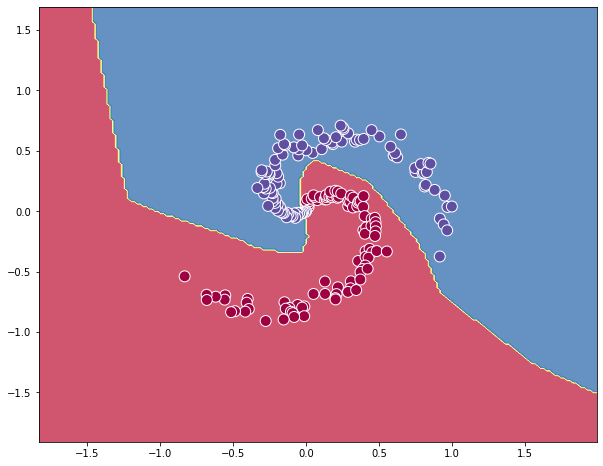

In [24]:
# plot the resulting classifier
plot_deep_neural_network(X, y, W, b, W2, b2, W3, b3)

<font color='red'> **(Homework exercise 1- e)** Interpret obtained plot and accuracy. Did the classifier become more rigid or more flexible? Why? Did the performance of the 3-layer network improve comparing to 2-layer network? **(1 point)** </font>


Answer to **(e)**: <font color="blue">The performance certainly improved and the classifier became more flexible. Adding a third layer allows the network to learn more complicated shapes. If the length of spirals were increased the 3-layer network would surely perform better.</font>

## Homework exercise 2 (2 points): adding and subtracting layers in Keras
<font color='red'> Sometimes you may want to experiment with the number of layers in your network. Adding or subtracting layers is one of the simplest ways to reduce overfitting or improve the performance of your model. Here we will practice adding and remove layers in Keras (feel the difference with pure Python). </font>


In [25]:
# A bit of setup again
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout

# Keras comes with built-in loaders for common datasets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# shorten dataset for quicker training
X_train = X_train[:25000]
y_train = y_train[:25000]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
Train data shape:  (25000, 32, 32, 3)
Train labels shape:  (25000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


In [26]:
mu = X_train.mean(axis=(0,1,2)) # finds mean of R, G and B separately
std = X_train.std(axis=(0,1,2)) # same for std
X_train_norm = (X_train - mu)/std
X_test_norm = (X_test - mu)/std

<font color='red'> **(Homework exercise 2- a)** Copy paste to cell below the initial CNN model created for CIFAR10. Next, remove the second Conv2D + BatchNorm + ReLu block and train this smaller network on the same data (make sure to correctly link the layers in the model). Visualise the learning curves. **(1 point)** </font>

In [27]:
##### YOUR CODE STARTS #####
x = Input(shape=(32, 32, 3))
c1 = Conv2D(32, (3, 3), strides=(1, 1), padding="same")(x) # (3 x 3) filter
b1 = BatchNormalization()(c1)
a1 = Activation('relu')(b1)

#c2 = Conv2D(32, (3, 3), strides=(1, 1), padding="valid")(a1) # removed
#b2 = BatchNormalization()(c2) # removed
#a2 = Activation('relu')(b2) # removed

p2 = MaxPooling2D(pool_size=2)(a1)
d2 = Dropout(rate=0.25)(p2)
f2 = Flatten()(d2) # tensor into vector
h3 = Dense(100)(f2)
b3 = BatchNormalization()(h3)
a3 = Activation('relu')(b3)
d3 = Dropout(rate=0.5)(a3)
z = Dense(10)(d3) # output 10 classes
p = Activation('softmax')(z)
##### YOUR CODE ENDS ##### 

In [28]:
smaller_model = Model(inputs=x, outputs=p)
smaller_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
smaller_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0     

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [29]:
# Fit the model; returns History object
history_smaller = smaller_model.fit(X_train_norm, y_train, batch_size=64, epochs=20, validation_split=0.1)

Epoch 1/20
352/352 [==============================] - 32s 87ms/step - loss: 1.7114 - accuracy: 0.3961 - val_loss: 1.3646 - val_accuracy: 0.5148
Epoch 2/20
352/352 [==============================] - 31s 87ms/step - loss: 1.3685 - accuracy: 0.5124 - val_loss: 1.1973 - val_accuracy: 0.5736
Epoch 3/20
352/352 [==============================] - 30s 85ms/step - loss: 1.2419 - accuracy: 0.5599 - val_loss: 1.1186 - val_accuracy: 0.5988
Epoch 4/20
352/352 [==============================] - 30s 85ms/step - loss: 1.1534 - accuracy: 0.5923 - val_loss: 1.1139 - val_accuracy: 0.6028
Epoch 5/20
352/352 [==============================] - 31s 88ms/step - loss: 1.0943 - accuracy: 0.6152 - val_loss: 1.0667 - val_accuracy: 0.6260
Epoch 6/20
352/352 [==============================] - 30s 84ms/step - loss: 1.0437 - accuracy: 0.6310 - val_loss: 1.0516 - val_accuracy: 0.6300
Epoch 7/20
352/352 [==============================] - 29s 84ms/step - loss: 0.9906 - accuracy: 0.6472 - val_loss: 1.0438 - val_accuracy:

Text(0.5, 1.0, 'Accuracy')

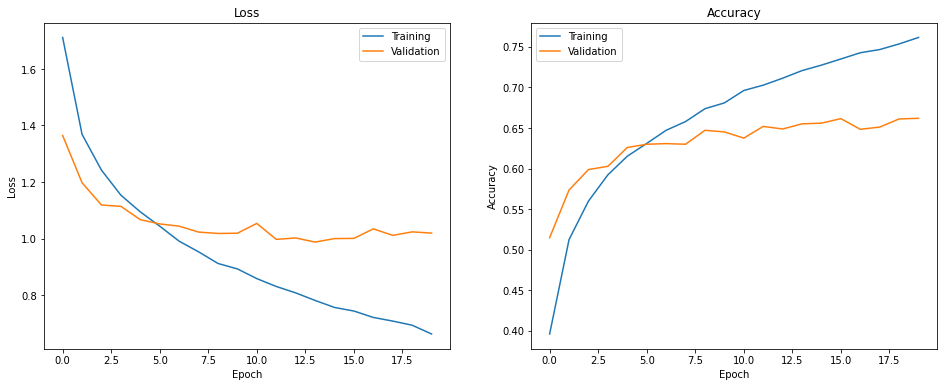

In [30]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history_smaller.history['loss'])
plt.plot(history_smaller.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_smaller.history['accuracy'])
plt.plot(history_smaller.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')

<font color='red'> **(Homework exercise 2- b)** Now make a bigger version of the same network, by adding additional Conv2D + BatchNorm + ReLu block. So you should have three Conv2D + BatchNorm + ReLu blocks now. Next train it and visualise learning curves **(0.5 points)**. </font>

In [31]:
##### YOUR CODE STARTS #####
x = Input(shape=(32, 32, 3))
c1 = Conv2D(32, (3, 3), strides=(1, 1), padding="same")(x) # (3 x 3) filter
b1 = BatchNormalization()(c1)
a1 = Activation('relu')(b1)
c2 = Conv2D(32, (3, 3), strides=(1, 1), padding="valid")(a1)
b2 = BatchNormalization()(c2) 
a2 = Activation('relu')(b2)

c2_new = Conv2D(32, (3, 3), strides=(1, 1), padding="valid")(a2) # added
b2_new = BatchNormalization()(c2) # added
a2_new = Activation('relu')(b2) # added

p2 = MaxPooling2D(pool_size=2)(a2_new)
d2 = Dropout(rate=0.25)(p2)
f2 = Flatten()(d2) # tensor into vector
h3 = Dense(100)(f2)
b3 = BatchNormalization()(h3)
a3 = Activation('relu')(b3)
d3 = Dropout(rate=0.5)(a3)
z = Dense(10)(d3) # output 10 classes
p = Activation('softmax')(z)
##### YOUR CODE ENDS ##### 

In [32]:
bigger_model = Model(inputs=x, outputs=p)
bigger_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
bigger_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_2 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_3 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                           

In [33]:
# Fit the model; returns History object
history_bigger = bigger_model.fit(X_train_norm, y_train, batch_size=64, epochs=20, validation_split=0.1)

Epoch 1/20
352/352 [==============================] - 82s 230ms/step - loss: 1.6591 - accuracy: 0.4219 - val_loss: 1.2239 - val_accuracy: 0.5724
Epoch 2/20
352/352 [==============================] - 79s 225ms/step - loss: 1.2494 - accuracy: 0.5598 - val_loss: 1.1187 - val_accuracy: 0.6016
Epoch 3/20
352/352 [==============================] - 82s 232ms/step - loss: 1.1018 - accuracy: 0.6101 - val_loss: 1.0213 - val_accuracy: 0.6484
Epoch 4/20
352/352 [==============================] - 80s 226ms/step - loss: 1.0072 - accuracy: 0.6463 - val_loss: 0.9809 - val_accuracy: 0.6504
Epoch 5/20
352/352 [==============================] - 81s 231ms/step - loss: 0.9439 - accuracy: 0.6672 - val_loss: 0.9583 - val_accuracy: 0.6652
Epoch 6/20
352/352 [==============================] - 80s 228ms/step - loss: 0.8853 - accuracy: 0.6848 - val_loss: 0.9748 - val_accuracy: 0.6636
Epoch 7/20
352/352 [==============================] - 82s 232ms/step - loss: 0.8385 - accuracy: 0.7028 - val_loss: 0.9133 - val_ac

Text(0.5, 1.0, 'Accuracy')

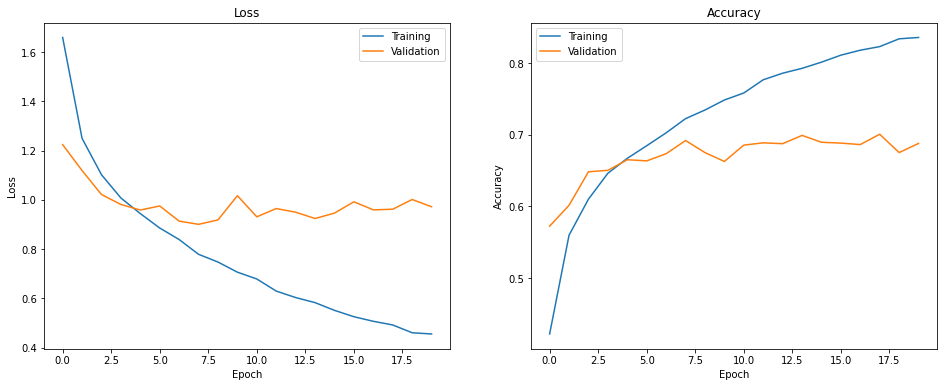

In [34]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history_bigger.history['loss'])
plt.plot(history_bigger.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_bigger.history['accuracy'])
plt.plot(history_bigger.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')

<font color='red'> **(Homework exercise 2- c)** Compare learning curves for smaller and bigger versions and say which version has overfitted the data more significantly? Why do you think so? Which network you would run in production? **(0.5 points)**. </font>

Answer to **(c)**: <font color="blue"> Learning curves are quite similar. The difference between val and train is ~ 0.150 for the larger model and ~0.1 for the smaller model, so the larger model overfitted more significantly. Although the larger model overfits more I would still choose it for production, because it performed better on validation data.</font> 

## Homework exercise 3 (2 points): Create your own dataset and build a CNN model using fast.ai API
<font color='red'> In this exercise, you have a chance to test if CNN can distinguish between images of your favourite objects. </font>

In [35]:
!pip install fastai==1.0.61

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 239 kB 4.7 MB/s 
     |████████████████████████████████| 355 kB 41.9 MB/s 
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19190 sha256=3483be17c32bf5b5fb39e03af53190ebe4e45761c2628f9f7845b950eb38735f
  Stored in directory: /root/.cache/pip/wheels/df/99/da/c34f202dc8fd1dffd35e0ecf1a7d7f8374ca05fbcbaf974b83
Successfully built nvidia-ml-py3
  Attempting uninstall: fastai
    Found existing installation: fastai 2.7.9
    Uninstalling fastai-2.7.9:
      Successfully uninstalled fastai-2.7.9


In [36]:
# Some setup first as usual
from fastai.vision import *
from fastai.metrics import error_rate

# We don't like warnings
import warnings
warnings.filterwarnings('ignore')

from urllib.request import urlopen

<font color='red'> **(Homework exercise 3- a)** Create your own dataset with two or more classes using the same approach we used in the class. But this time choose classes yourself. **(1 point)** </font>

upload dolphin.csv


Saving dolphin.csv to dolphin.csv


upload shark.csv


Saving shark.csv to shark.csv


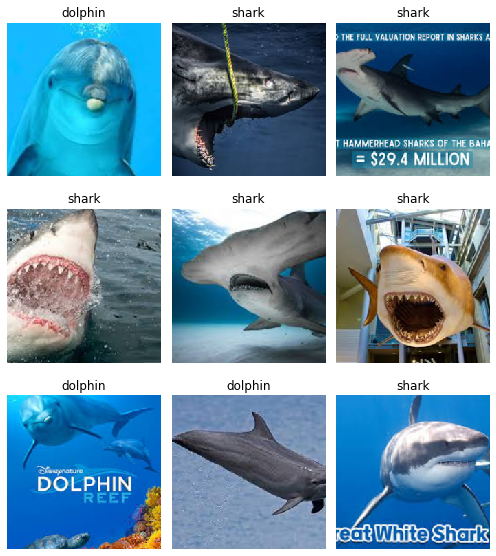

In [37]:
##### YOUR CODE STARTS #####
from google.colab import files

def upload_images(path, file_name):
  print(f"upload {file_name}.csv")
  upload = files.upload()
  folder = file_name
  file = file_name + '.csv'
  dest = path/folder
  dest.mkdir(parents=True, exist_ok=True)
  download_images(file_name + '.csv', dest, max_pics=400)

path = Path('data/animals')
classes = ['dolphin', 'shark']

upload_images(path, classes[0])
upload_images(path, classes[1])

data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                  size=224, num_workers=4).normalize(imagenet_stats)

data.show_batch(rows=3, figsize=(7,8))
##### YOUR CODE ENDS ##### 

In [38]:
# add more cells as necessary

<font color='red'> **(Homework exercise 3- b)** train a neural network on images you have acquired **(0.5 points)** </font>

In [39]:
##### YOUR CODE STARTS #####
learn = cnn_learner(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(5)
##### YOUR CODE ENDS ##### 

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

Plot the confusion matrix to make sure that you model has learned something:

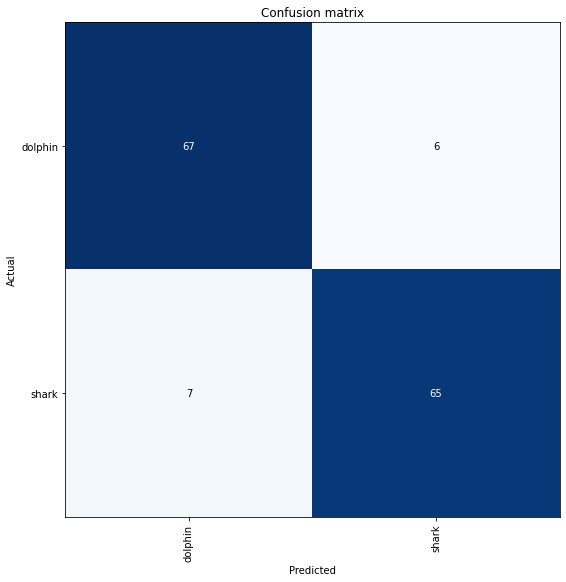

In [40]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

<font color='red'> **(Homework exercise 3- c)** Test your model on one or more images from the internet that represent classes you have chosen, but unlikely to be in the training data (you can change your search query). Print out class probabilities for one of these test images. **(0.5 points)** </font>

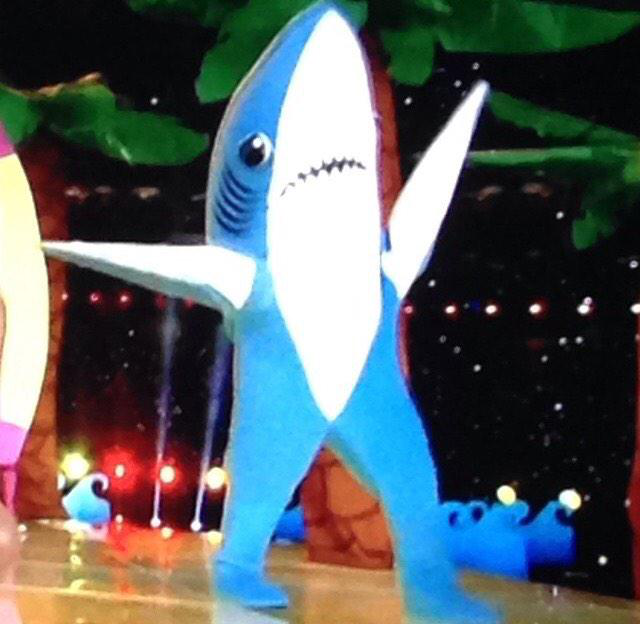

In [41]:
##### YOUR CODE STARTS #####
url = 'https://pbs.twimg.com/media/B8zb7IiCQAAPmwA?format=jpg&name=small'
img = open_image(urlopen(url))
img
##### YOUR CODE ENDS ##### 

In [42]:
# What are the probabilities of different classes for this image?
##### YOUR CODE STARTS #####
pred_class,pred_idx,outputs = learn.predict(img)
print(f"{classes[0]} {100* outputs[0]:.2f}%, {classes[1]} {100* outputs[1]:.2f}%")
pred_class.obj
##### YOUR CODE ENDS ##### 

dolphin 15.67%, shark 84.33%


'shark'

# Bonus exercises
*(NB, these are optional exercises!)* 

## Bonus exercise 1 (2 bonus points):

<font color='red'> [Stable Diffusion](https://stability.ai/blog/stable-diffusion-announcement) model has been recently shown to produce trully impressive results in image generation. Let's explore some of its power in this auxiliarly exercise. Use Stable Diffusion model from this [colab](https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/stable_diffusion.ipynb?hl=en). Generate several tricky images to test the model you trained in the exercise 3. Report the images that you have generated with Stable Diffusion, prompt that you have used for generating them, the number of iterations that you used to generate images and the classification results from your CNN model. Shortly summarise the results you have obtained. </font>

<font color="blue">My model differentiates dolphins and sharks. I generated an image of a shark toy on the beach and several images of graffiti of sharks and dolphins. I chose graffiti because the representations varied quite a bit and surprisingly only one graffiti of dolphins got misclassified. </font>

<font color="blue">Prompts used for these images: "shark toy on beach", "cyberpunk dolphin graffiti on a wall", "cyberpunk shark graffiti on a wall". I tried many different promps which didn't give interesting results, so I don't really know how many interations I used. All I know is that I tried generating new images until I was prompted to use Colab Pro. </font>

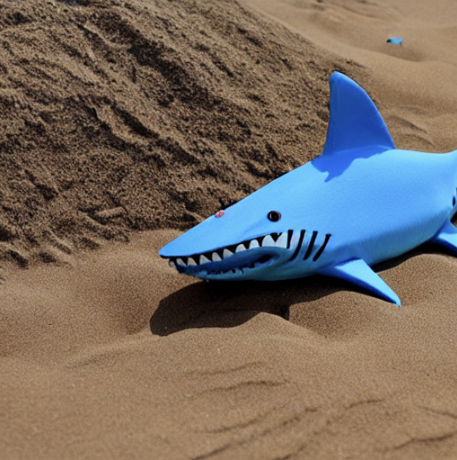

dolphin 0.02%, shark 99.98%


In [45]:
def show_image(id):
  created_images = [
    'https://i.imgur.com/PqmGNd8.png',
    'https://i.imgur.com/dZxt1KH.png',
    'https://i.imgur.com/8q8iZx8.png',
    'https://i.imgur.com/3lVlst9.png',
    'https://i.imgur.com/V7amImW.png',
    'https://i.imgur.com/yLQaP7I.png',
    'https://i.imgur.com/T7gTwhO.png',
    'https://i.imgur.com/UNWAKOI.png',
    'https://i.imgur.com/7P2wdIy.png',
    'https://i.imgur.com/0iq9uyX.png'
  ]
  img = open_image(urlopen(created_images[id]))
  display(img)
  pred_class,pred_idx,outputs = learn.predict(img)
  print(f"{classes[0]} {100* outputs[0]:.2f}%, {classes[1]} {100* outputs[1]:.2f}%")  
  

show_image(0)

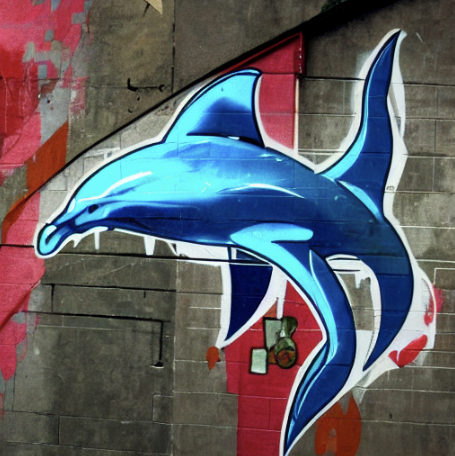

dolphin 25.98%, shark 74.02%


In [46]:
show_image(1)

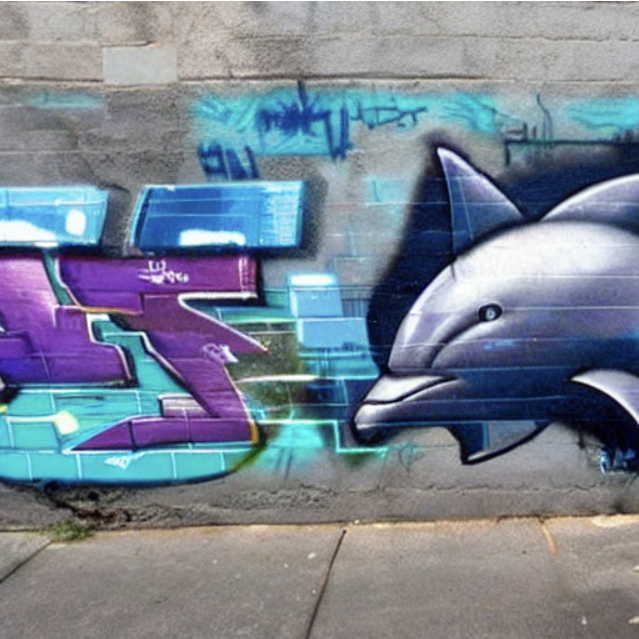

dolphin 75.34%, shark 24.66%


In [47]:
show_image(2)

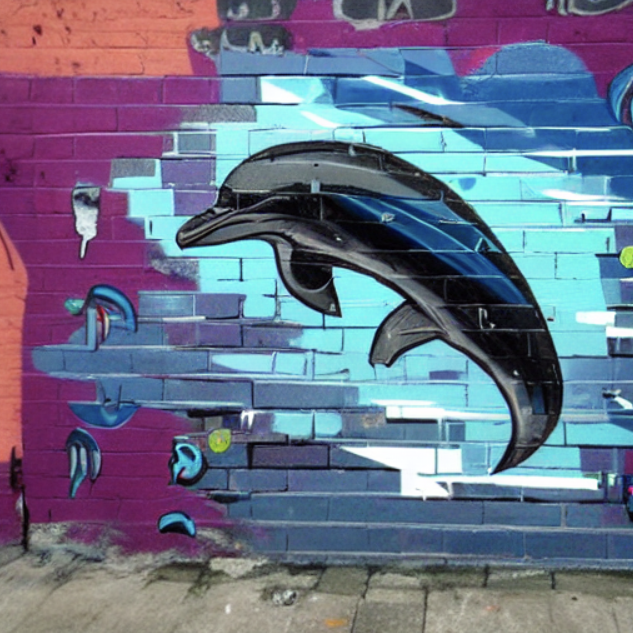

dolphin 98.96%, shark 1.04%


In [48]:
show_image(3)

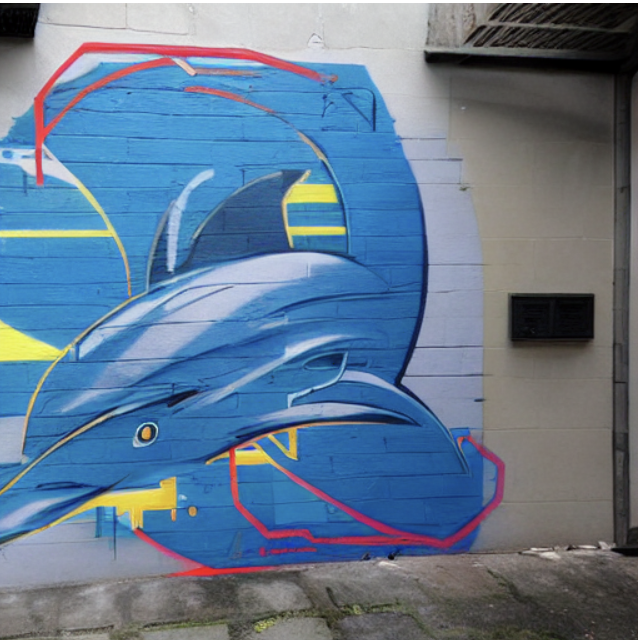

dolphin 95.75%, shark 4.25%


In [49]:
show_image(4)

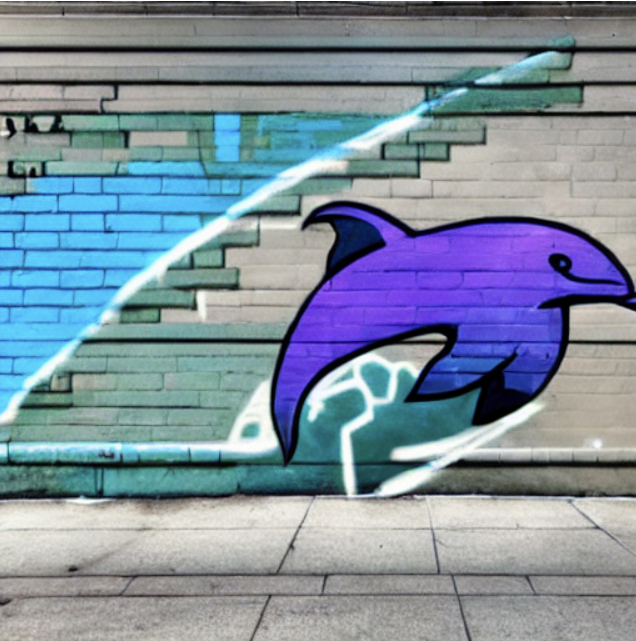

dolphin 98.84%, shark 1.16%


In [50]:
show_image(5)

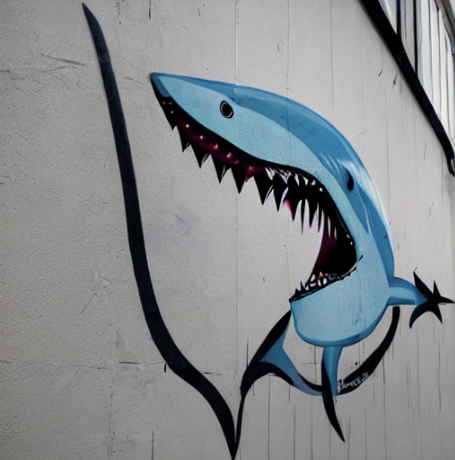

dolphin 0.00%, shark 100.00%


In [51]:
show_image(6)

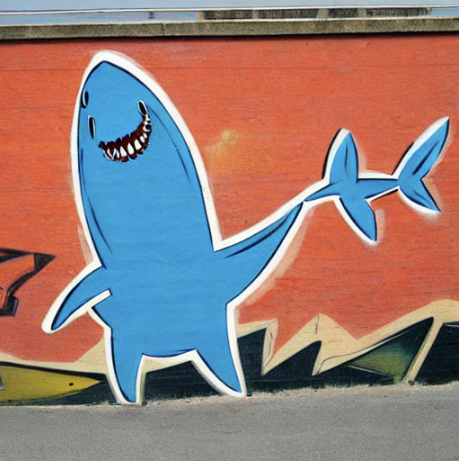

dolphin 0.02%, shark 99.98%


In [52]:
show_image(7)

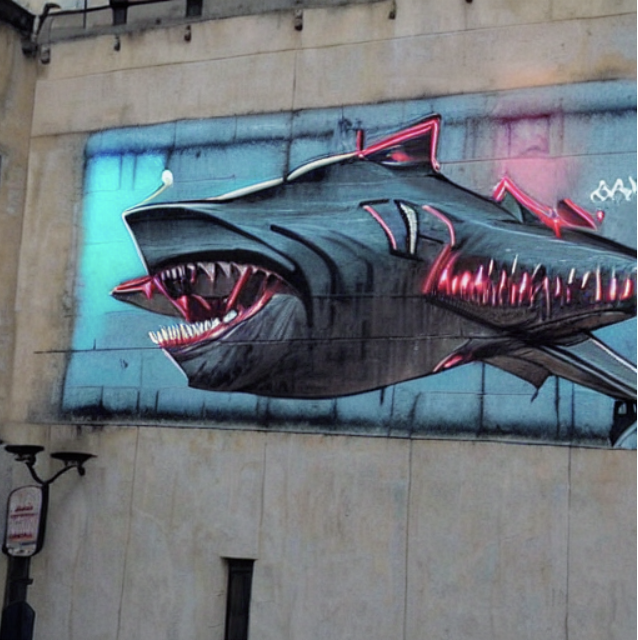

dolphin 0.00%, shark 100.00%


In [53]:
show_image(8)

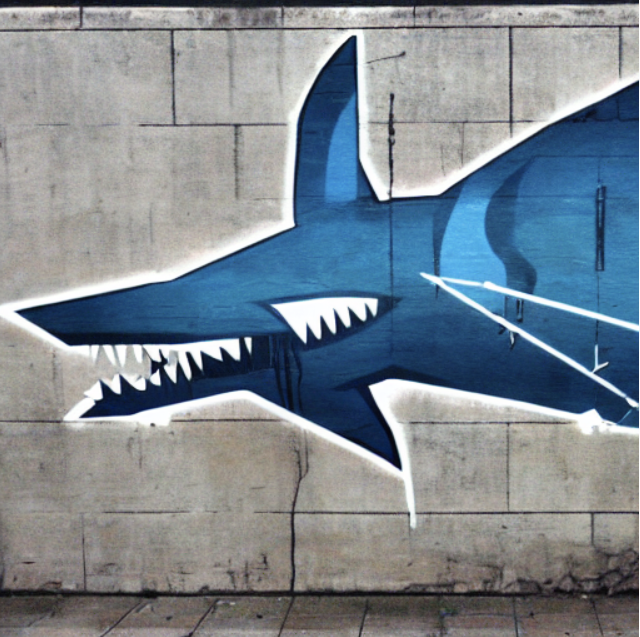

dolphin 0.00%, shark 100.00%


In [54]:
show_image(9)

## Bonus exercise 2 (2 bonus points):

<font color='red'> Take the code of the 3-layer network that you have constructed in the homework exercise 1, and substitute all ReLu activations with sigmoid. Change the corresponding feed-forward and backward paths to account for this change. Then run as many iterations (epochs) as we have in exercise 1 and report the resulting performance (accuracy). Visualise the obtained classifier and interpret the results. Did the network with sigmoid perform better or worse? </font>

# Comments (optional feedback to the course instructors)
Here, please, leave your comments regarding the homework, possibly answering the following questions: 
* how much time did you spend on this homework?
* was it too hard/easy for you?
* what would you suggest to add or remove?
* anything else you would like to tell us

Your comments: Cells 43 and 44 are missing because displaying all images in a single cell didn't work so those were deleted. Because my gpu usage reached its limit I didn't run all cells again.

# <font color='red'>  End of the homework. Please don't delete this cell.</font>